In [1]:
import pandas as pd
import random
import time


In [6]:
def ShuffleAndSplit(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)

    n = len(X)
    indices = list(range(n))
    random.shuffle(indices)

    split = int(n * (1 - test_size))

    X_train = [X[i] for i in indices[:split]]
    y_train = [y[i] for i in indices[:split]]
    X_test = [X[i] for i in indices[split:]]
    y_test = [y[i] for i in indices[split:]]

    return (X_train,y_train),(X_test, y_test)

In [7]:
def LoadData(filepath):
    df=pd.read_csv(filepath)
    #filling NaN as 0.0
    
    df['total_bedrooms'].fillna(0.0, inplace=True)
    #with pandas also we can convert categorical column to numerical columns same like one hot encoding
    df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    #For Normalization
    X = (X - X.min()) / (X.max() - X.min())
    (X_train, y_train), (X_test, y_test)= ShuffleAndSplit(X.values.tolist(), y.values.tolist(), test_size=0.2, random_seed=42)
    return (X_train, y_train), (X_test, y_test)

    


In [8]:
def Predict(X, W):
    return [sum(xi * wi for xi, wi in zip(x, W)) for x in X]

In [13]:

def ComputeCost(X, y, W):
    m = len(y)
    preds = Predict(X, W)
    return sum((p - yi)**2 for p, yi in zip(preds, y)) / m


In [11]:
def GradientDescent(X, y, lr=0.01, epochs=100):
    m = len(y)
    n = len(X[0])
    W = [0.0] * n
    CostHistory = []

    for epoch in range(epochs):
        preds = Predict(X, W)
        gradients = [0.0] * n
        for i in range(m):
            error = preds[i] - y[i]
            for j in range(n):
                gradients[j] += error * X[i][j]

        for j in range(n):
            W[j] -= (lr/m ) * gradients[j]

        cost = ComputeCost(X, y, W)
        CostHistory.append(cost)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return W, CostHistory

In [15]:
if __name__ == "__main__":
     # Update to your dataset path:
    filepath = r"C:\myfiles\sem4\housing.csv" 
    (X_train, y_train), (X_test, y_test) = LoadData(filepath)

    start = time.time()
    W, CostHistory = GradientDescent(X_train, y_train, lr=0.02, epochs=1000)
    duration = time.time() - start

    print(f"\nTraining completed in {duration:.2f} seconds")
    print("Final cost:", CostHistory[-1])

    # Evaluate on test data:
    preds = Predict(X_test, W)
    m = len(y_test)
    mae = sum(abs(p - y) for p, y in zip(preds, y_test)) / m
    rmse = (sum((p - y)**2 for p, y in zip(preds, y_test)) / m) ** 0.5
    ymean = sum(y_test) / m
    SquareSumofTotal= sum((y - ymean) ** 2 for y in y_test)
    SquareSumofModel= sum((y - p) ** 2 for y, p in zip(y_test, preds))
    r2 = 1 - (SquareSumofModel / SquareSumofTotal)

    print(f"\nTest MAE: {mae:.2f}")
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test R² Score: {r2:.4f}")


C:\Users\ravik\AppData\Local\Temp\ipykernel_13372\4046431317.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(0.0, inplace=True)


Epoch 0: Cost = 54221471486.81362
Epoch 10: Cost = 39742891696.66199
Epoch 20: Cost = 30240395926.66284
Epoch 30: Cost = 23981273333.57085
Epoch 40: Cost = 19837611373.610786
Epoch 50: Cost = 17075067829.28363
Epoch 60: Cost = 15215427376.3052
Epoch 70: Cost = 13947167444.478542
Epoch 80: Cost = 13067262397.529467
Epoch 90: Cost = 12443313772.083935
Epoch 100: Cost = 11988906348.057154
Epoch 110: Cost = 11647570162.492281
Epoch 120: Cost = 11382342440.970625
Epoch 130: Cost = 11168973500.923208
Epoch 140: Cost = 10991503931.115414
Epoch 150: Cost = 10839384919.53674
Epoch 160: Cost = 10705602868.737703
Epoch 170: Cost = 10585457655.831842
Epoch 180: Cost = 10475766363.850204
Epoch 190: Cost = 10374344000.163572
Epoch 200: Cost = 10279664570.82929
Epoch 210: Cost = 10190639620.83295
Epoch 220: Cost = 10106473306.238535
Epoch 230: Cost = 10026567351.96688
Epoch 240: Cost = 9950458546.915825
Epoch 250: Cost = 9877777479.319012
Epoch 260: Cost = 9808221153.67723
Epoch 270: Cost = 974153469

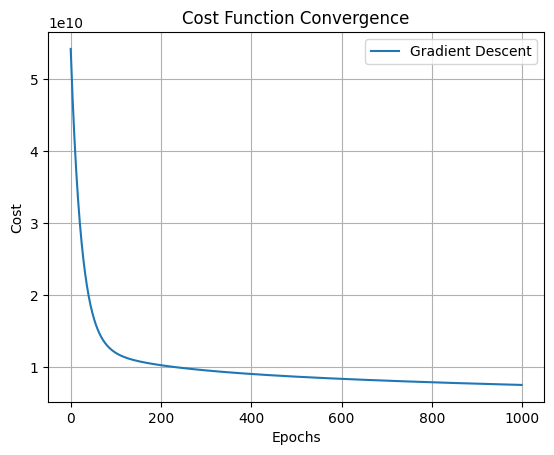

In [16]:
import matplotlib.pyplot as plt
def plot_cost(costs):
    plt.plot(costs, label='Gradient Descent')
    
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_cost(CostHistory)